In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing as fch
from sklearn.linear_model import LinearRegression
import seaborn as sns

## 多元线性回归

### 建模

In [2]:
house = fch()

In [3]:
df = pd.DataFrame(house.data, columns=house.feature_names)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
house.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
X = house.data
Y = house.target

/home/gavin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


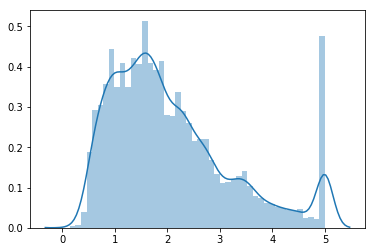

In [7]:
# 房价的数据分布
sns.distplot(Y)
plt.show()

In [8]:
## 划分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y
                                                , test_size = 0.3
                                                , random_state=0
                                               )

In [9]:
## 多元线性回归, 默认损失为残差平方和RSS
LR = LinearRegression()
reg = LR.fit(Xtrain, Ytrain)

In [10]:
## 评测
reg.score(Xtest, Ytest)

0.5926087785518774

In [11]:
# 输出预测结果
Y_pred = reg.predict(Xtest)
Y_pred

array([2.2702672 , 2.79059912, 1.90984782, ..., 3.56895295, 0.98163812,
       2.72552317])

In [12]:
# 输出系数值（即回归后的系数）
reg.coef_

array([ 4.46773975e-01,  9.18409990e-03, -1.18116775e-01,  6.42290879e-01,
       -9.37026507e-06, -4.08535934e-03, -4.09023312e-01, -4.23419564e-01])

In [13]:
# 观察值
[*zip(house.feature_names, reg.coef_)]

[('MedInc', 0.4467739747419856),
 ('HouseAge', 0.009184099904557189),
 ('AveRooms', -0.11811677469492994),
 ('AveBedrms', 0.6422908791744342),
 ('Population', -9.370265069752946e-06),
 ('AveOccup', -0.0040853593409713885),
 ('Latitude', -0.4090233123057441),
 ('Longitude', -0.4234195638425424)]

In [14]:
## 查看截距
reg.intercept_

-36.01222888765237

### 模型指标（均方误差）
第一，我们是否预测到了正确的数值。  
第二，我们是否拟合到了足够的信息。

#### 是否正确

In [15]:
from sklearn.metrics import mean_squared_error as MSE

In [16]:
# 均方误差
MSE(Ytest,Y_pred)

0.5431489670037241

In [17]:
# 使用交差验证(和MSE只差符合)
cross_val_score(LR, X, Y
                , cv = 10
                , scoring='neg_mean_squared_error'
               ).mean()

-0.550952429695665

In [18]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

#### 是否拟合

In [19]:
## 模型评估指标r2
from sklearn.metrics import r2_score
r2_score(Ytest, Y_pred)

0.5926087785518774

In [20]:
## 多元线性回归的接口返回r2
reg.score(Xtest, Ytest)

0.5926087785518774

In [21]:
## 使用交差验证
cross_val_score(LR, X, Y
                , cv = 10
                , scoring="r2"
               ).mean()

0.5110068610523762

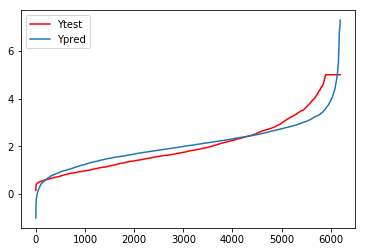

In [22]:
## 观察数据的拟合情况
plt.plot(range(len(Xtest)), sorted(Ytest), c="r" ,label="Ytest")
plt.plot(range(len(Xtest)), sorted(Y_pred), label="Ypred")
plt.legend()
plt.show()

/home/gavin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


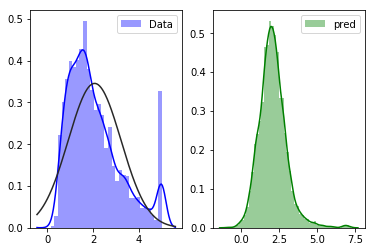

In [23]:
from scipy.stats import norm
fig, axes = plt.subplots(1, 2)
sns.distplot(Ytest, ax=axes[0], color="b", label="Data", fit=norm)
sns.distplot(Y_pred, ax=axes[1], color="g", label="pred")
axes[0].legend()
axes[1].legend()
plt.show()

In [24]:
# 负数的R2,有点意思(如果是负数就是有一点糟糕了，及时检查参数，越接近1越好)
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LinearRegression(), X, y
                , cv=5
                , scoring='r2'
               ).mean()

-70.02881840463736

## 岭回归

### 加利福尼亚房价数据

In [25]:
from sklearn.linear_model import Ridge

In [26]:
reg = Ridge(alpha=1).fit(Xtrain, Ytrain)

In [27]:
# 返回r2
reg.score(Xtest, Ytest)

0.592609622050885

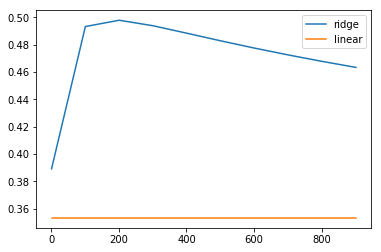

In [45]:
## 探索不同正则化系数下的数据分布情况
alphas = np.arange(1, 1001, 100)
ridge, lr = [], []

for i in alphas:
    reg = Ridge(alpha=i)
    liner = LinearRegression()
    regs = cross_val_score(reg, X, Y, scoring="r2", cv=5).mean()
    liners = cross_val_score(liner, X, Y, scoring="r2", cv=5).mean()
    ridge.append(regs)
    lr.append(liners)
    
plt.plot(alphas, ridge, label="ridge")
plt.plot(alphas, lr, label = "linear")
plt.legend()
plt.show()

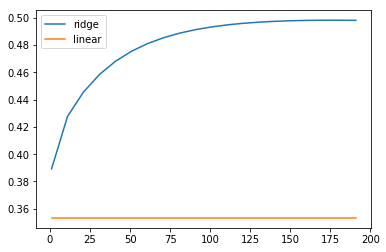

In [32]:
## 细化
alphas = np.arange(1, 201, 10)
ridge, lr = [], []

for i in alphas:
    reg = Ridge(alpha=i)
    liner = LinearRegression()
    regs = cross_val_score(reg, X, Y, scoring="r2", cv=5).mean()
    liners = cross_val_score(liner, X, Y, scoring="r2", cv=5).mean()
    ridge.append(regs)
    lr.append(liners)
    
plt.plot(alphas, ridge, label="ridge")
plt.plot(alphas, lr, label = "linear")
plt.legend()
plt.show()

结论：模型可能存在少量的多重共线性，即使在做完岭回归之后，模型的效果也没有明显的提升，除此之外，很可能因为正则化系数过大，过度压缩参数，导致模型整体水平下滑。

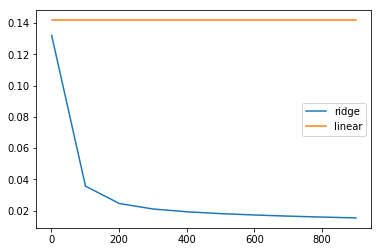

In [33]:
## 方差
alphas = np.arange(1, 1001, 100)
ridge, lr = [], []

for i in alphas:
    reg = Ridge(alpha=i)
    liner = LinearRegression()
    regs = cross_val_score(reg, X, Y, scoring="r2", cv=5).var()
    liners = cross_val_score(liner, X, Y, scoring="r2", cv=5).var()
    ridge.append(regs)
    lr.append(liners)
    
plt.plot(alphas, ridge, label="ridge")
plt.plot(alphas, lr, label = "linear")
plt.legend()
plt.show()

### 波士顿房价数据
通过观察方差和偏差来得到模型的泛化能力。

In [34]:
from sklearn.datasets import load_boston

In [35]:
boston = load_boston()
X, Y = boston.data, boston.target

In [36]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y
                                                , test_size=0.3
                                                , random_state = 1
                                               )

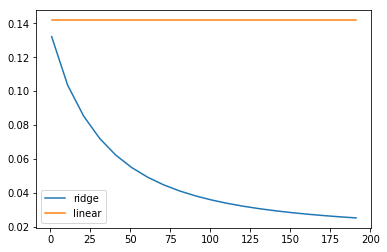

In [37]:
## 方差
alphas = np.arange(1, 201, 10)
ridge, lr = [], []

for i in alphas:
    reg = Ridge(alpha=i)
    liner = LinearRegression()
    regs = cross_val_score(reg, X, Y, scoring="r2", cv=5).var()
    liners = cross_val_score(liner, X, Y, scoring="r2", cv=5).var()
    ridge.append(regs)
    lr.append(liners)
    
plt.plot(alphas, ridge, label="ridge")
plt.plot(alphas, lr, label = "linear")
plt.legend()
plt.show()

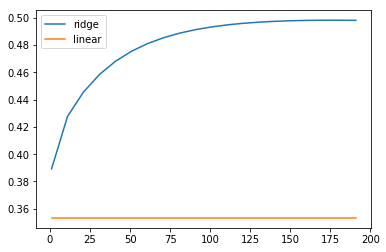

In [38]:
alphas = np.arange(1, 201, 10)
ridge, lr = [], []

for i in alphas:
    reg = Ridge(alpha=i)
    liner = LinearRegression()
    regs = cross_val_score(reg, X, Y, scoring="r2", cv=5).mean()
    liners = cross_val_score(liner, X, Y, scoring="r2", cv=5).mean()
    ridge.append(regs)
    lr.append(liners)
    
plt.plot(alphas, ridge, label="ridge")
plt.plot(alphas, lr, label = "linear")
plt.legend()
plt.show()

结论：波士顿房价存在多重共线性，可以通过正则化系数来调节

### 如何选择最佳的$\alpha$的值

In [39]:
## 带有交差验证的岭回归
from sklearn.linear_model import RidgeCV

In [46]:
reg = RidgeCV(alphas=(1, 1001, 100)
              , store_cv_values=True
             ).fit(X, Y)

In [47]:
reg.score(Xtest, Ytest)

0.8164034098963907

In [49]:
reg.cv_values_

array([[ 40.43439122,  48.6194074 ,  53.03596112],
       [ 10.50095584,  18.87006168,  11.44479025],
       [ 17.7864549 ,  25.77123173,  22.08285672],
       ...,
       [ 17.07274067,  16.31845784,  18.08108808],
       [ 20.68282383,  24.83728461,  23.8178617 ],
       [120.99657642, 178.95921263, 150.8511894 ]])

In [43]:
X.shape

(506, 13)

In [44]:
reg.alpha_

1